# TPP11

Author: Shangfei Wang | Date: 17/10/2022

In this TPP, I will replace the other two datasets for testing on my subproblem. My sub-question is "Is weekly steps predictable?".

## Import packages and Read Data

Below are the packages that need to be used. 'datetime' is used to aid in the analysis of time data.

In [1]:
# Date started: 10/10/2022

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Read the required data from github.

In [2]:
# Date started: 02/10/2022
# Modified Date: 17/10/2022

# df = pd.read_csv("resources/Participant-07.csv")

# Participant-07
# df = pd.read_csv('https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-07.csv?token=GHSAT0AAAAAAAAAHGL37VAX3V3S56I6ITZSY2OIXMA')

# Participant-08
# df = pd.read_csv('https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-08.csv?token=GHSAT0AAAAAAAAAHGL3GLCSZRLNPPOKRLTYY2XT23A')

# Participant-04
df = pd.read_csv('https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-04.csv?token=GHSAT0AAAAAAAAAHGL346WKEGWZX7W42KK4Y2XUJGA')


## Data clean

First, split the date and time to facilitate subsequent analysis of the date.

In [3]:
# Date started: 10/10/2022

df['Date'] = df['Start'].map(lambda x:x.split(' ')[0])  # Split to get 'Date' column
df['Time'] = df['Start'].map(lambda x:x.split(' ')[1])  # Split to get 'Time' column
df


,Start,Finish,Steps (count),Date,Time
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0,01-Jan-2022,00:00
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0,01-Jan-2022,01:00
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0,01-Jan-2022,02:00
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0,01-Jan-2022,03:00
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0,01-Jan-2022,04:00
...,...,...,...,...,...
6018,08-Sep-2022 17:00,08-Sep-2022 18:00,537.0,08-Sep-2022,17:00
6019,08-Sep-2022 18:00,08-Sep-2022 19:00,188.0,08-Sep-2022,18:00
6020,08-Sep-2022 19:00,08-Sep-2022 20:00,215.0,08-Sep-2022,19:00
6021,08-Sep-2022 20:00,08-Sep-2022 21:00,727.0,08-Sep-2022,20:00


Replace index and set date as index.

In [4]:
# Date started: 10/10/2022

df['date'] = pd.to_datetime(df['Date'])
df.set_index("date", inplace=True) # change index

df

,Start,Finish,Steps (count),Date,Time
date,,,,,
2022-01-01,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0,01-Jan-2022,00:00
2022-01-01,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0,01-Jan-2022,01:00
2022-01-01,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0,01-Jan-2022,02:00
2022-01-01,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0,01-Jan-2022,03:00
2022-01-01,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0,01-Jan-2022,04:00
...,...,...,...,...,...
2022-09-08,08-Sep-2022 17:00,08-Sep-2022 18:00,537.0,08-Sep-2022,17:00
2022-09-08,08-Sep-2022 18:00,08-Sep-2022 19:00,188.0,08-Sep-2022,18:00
2022-09-08,08-Sep-2022 19:00,08-Sep-2022 20:00,215.0,08-Sep-2022,19:00


Setting the date as index is to consolidate the data for a week. This matches the time frequency of advanced driving problems.

The data is aggregated by running resample('w').sum() . The data is consolidated from daily recorded steps into weekly steps.

Resample in Pandas, resampling, is a method of reprocessing the original sample, and it is a convenient method for resampling and frequency conversion of regular time series data.

In [5]:
# Date started: 10/10/2022

print(df.resample('w').sum()) # 'w' stands for weeks.


            Steps (count)
date                     
2022-01-02   24106.000000
2022-01-09   71137.008341
2022-01-16   72000.345535
2022-01-23   76708.552968
2022-01-30   82691.949753
2022-02-06   72231.710790
2022-02-13   86187.376206
2022-02-20   83411.319657
2022-02-27   74467.556502
2022-03-06   74257.261975
2022-03-13   76971.907148
2022-03-20   88086.022544
2022-03-27   74296.550627
2022-04-03   87735.013219
2022-04-10  102352.334092
2022-04-17   91624.177476
2022-04-24   67799.814020
2022-05-01   95130.818086
2022-05-08   90964.585994
2022-05-15   91499.702645
2022-05-22  101551.263522
2022-05-29   79357.656704
2022-06-05   72173.444264
2022-06-12   67030.005687
2022-06-19   72099.640858
2022-06-26   74815.000000
2022-07-03   64281.430580
2022-07-10   91374.176529
2022-07-17   77650.116865
2022-07-24   91945.011896
2022-07-31   89171.191956
2022-08-07   64927.173432
2022-08-14   80031.000000
2022-08-21   83811.108866
2022-08-28   68071.257631
2022-09-04   80499.382549
2022-09-11  

## New content starting at week10

Forecasting in days is more accurate. So I will temporarily convert the time unit in weeks to the time unit in days.

In [6]:
# Date started: 10/10/2022

new_df = df.resample('d').sum()
# new_df.rename({'Steps (count)': 'StepCount'}, axis=1, inplace=True)

new_df.head(10)

,Steps (count)
date,
2022-01-01,6291.000000
2022-01-02,17815.000000
2022-01-03,8173.715753
2022-01-04,8843.948159
2022-01-05,8341.344430
2022-01-06,6382.000000
2022-01-07,17384.000000
2022-01-08,15248.000000
2022-01-09,6764.000000


The above is the number of steps counted in days.

Now we will create a rolling average using pandas.datafframe.rolling with a window size of 10.

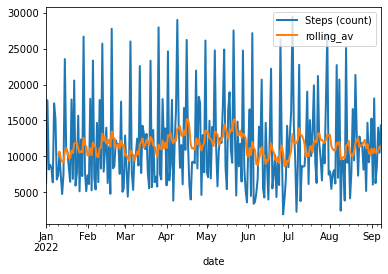

In [7]:
# Date started: 10/10/2022

new_df['rolling_av'] = new_df['Steps (count)'].rolling(10).mean()
# take a look
new_df[['Steps (count)','rolling_av']].plot(lw=2);

The chart above shows the trend of daily steps and the average rolling trend.

Below is the model to use for prediction, I will use the ARIMA model for my subproblem.

In [8]:
# Date started: 10/10/2022

from statsmodels.tsa.arima.model import ARIMA   #Add new packages that need to be used
ARMA_model = ARIMA(endog=new_df['Steps (count)'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          Steps (count)   No. Observations:                  251
Model:                ARIMA(0, 0, 10)   Log Likelihood               -2520.223
Date:                Tue, 18 Oct 2022   AIC                           5064.447
Time:                        19:49:16   BIC                           5106.752
Sample:                    01-01-2022   HQIC                          5081.472
                         - 09-08-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    338.831     33.980      0.000    1.08e+04    1.22e+04
ma.L1         -0.1854      0.078     -2.367      0.018      -0.339      -0.032
ma.L2         -0.1542      0.103     -1.491      0.1

Some basic data can be obtained through the calculation of the model. The figure above shows this data.

According to the timeline provided by the dataset, I divided the forecast part into 2022-06-01 to 2022-09-18.

In [9]:
# Date started: 10/10/2022

start_date = '2022-06-01'
end_date   = '2022-09-18'
new_df['forecast'] = results.predict(start=start_date, end=end_date)  # Forecast for the selected date range.

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [10]:
# Date started: 10/10/2022

a = new_df[['Steps (count)','rolling_av','forecast']]
a

,Steps (count),rolling_av,forecast
date,,,
2022-01-01,6291.000000,NaN,NaN
2022-01-02,17815.000000,NaN,NaN
2022-01-03,8173.715753,NaN,NaN
2022-01-04,8843.948159,NaN,NaN
2022-01-05,8341.344430,NaN,NaN
...,...,...,...
2022-09-04,6273.361038,10519.450788,7800.689616
2022-09-05,8598.000000,10563.950788,12946.591728
2022-09-06,14000.000000,10826.938255,12004.537631


The table above is a forecast by date.

Since our high level driving problem is in weeks, here I will reconvert the time units to weeks.

In [11]:
# Date started: 10/10/2022

pre_df = a.resample('w').sum()
pre_df

,Steps (count),rolling_av,forecast
date,,,
2022-01-02,24106.000000,0.000000,0.000000
2022-01-09,71137.008341,0.000000,0.000000
2022-01-16,72000.345535,70789.551568,0.000000
2022-01-23,76708.552968,74880.109407,0.000000
2022-01-30,82691.949753,79023.250013,0.000000
2022-02-06,72231.710790,76328.985980,0.000000
2022-02-13,86187.376206,78853.283651,0.000000
2022-02-20,83411.319657,85962.607984,0.000000
2022-02-27,74467.556502,81779.143248,0.000000


The figure below shows a discounted comparison of the actual number of steps and the predicted number of steps.

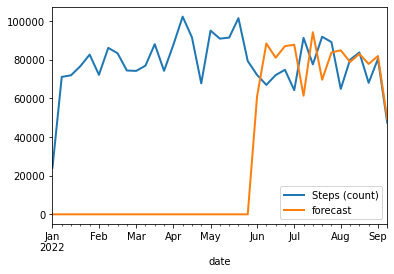

In [12]:
# Date started: 10/10/2022

pre_df[['Steps (count)','forecast']].plot(lw=2);

From this figure, it can be found that there is still a certain difference between the number of steps predicted in the first few months and the actual number of steps in the next few months. This shows that people's activities may vary greatly at different times, and may be affected by various factors, and there is uncertainty.

## Conclusion

Through this part, I have completed my own sub-question, which can be modified later if necessary.